## Deluppgift 1
Ev. kommentar:

In [11]:
import csv

def read_file(file_name):
    data_list = []
    with open(file_name, "r", encoding="UTF-8") as file:
        csv_reader = csv.reader(file, delimiter=";")
        for line in csv_reader:
            data_list.append(line)
    
    return data_list

kpiData = read_file("data/kpi-1.csv")
tjansteData = read_file("data/livsmedel-1.csv")
livsmedelData = read_file("data/tjänster-1.csv")

print(kpiData[:3])
print("------")
print(tjansteData[:3])
print("------")
print(livsmedelData[:3])


[['År', 'Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'], ['2022', '350.56', '353.56', '359.8', '362.02', '365.82', '370.95', '371.28'], ['2021', '338.09', '339.01', '339.54', '340.37', '341.04', '341.32', '342.23', '343.99', '345.74', '346.44', '348.03', '352.47']]
------
[['', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], ['bröd och övriga spannmålsprodukter', '100.00', '116.47', '131.24', '148.49', '164.87', '178.74', '191.17', '198.13', '216.90', '238.58', '262.50', '274.73', '262.53', '258.58', '251.93', '245.47', '229.23', '228.76', '230.67', '236.64', '240.13', '243.04', '249.16', '249.30', '249.54', '247.38', '245.60', '254.06', '279.80', '286.05', '288.29',

## Deluppgift 2
Ev. kommentar:

För vilken månad som KPI ska presenteras? w
För vilken månad som KPI ska presenteras? f
För vilken månad som KPI ska presenteras? 2


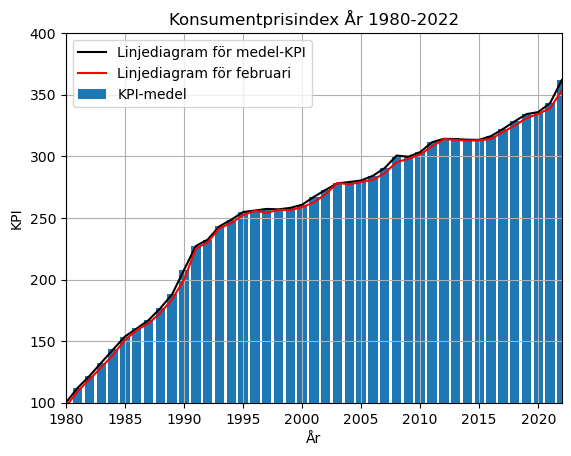

In [13]:
import matplotlib.pyplot as plt


def calculate_yearly_means():
    yearly_means = []
    for year in kpiData[1:]:
        yearly_means.append(_calculate_mean_for_year(year))
    # Vi vill ha värden i stigande årtalsordning
    yearly_means.reverse()
    return yearly_means


def _calculate_mean_for_year(year):
    # Första kolumnen innehåller året, så den tar vi bort när vi räknar på medelvärdet
    # Jag använder mig av list comprehension för att göra om värden till float innan
    # beräkning av medelvärdet
    return sum([float(value) for value in year[1:]]) / (len(year) - 1)


# Hjälpfunktion för att hämta KPI för en månad
def get_kpis_for_month(month):
    values = _get_values_for_month(month)
    # Vi vill ha värden i stigande årtalsordning
    values.reverse()
    return values


# Hjälpfunktion för att hämta ut värden för en specifik månad
def _get_values_for_month(month):
    month_values = []
    # Jag hoppar över första raden eftersom den innehåller rubriker
    for year in kpiData[1:]:
        # Om användaren har valt en månad som inte har värde skippar vi den.
        if not len(year) - 1 < month:
            month_values.append(float(year[month]))

    return month_values


# Hjälpfunktion för att hämta alla år från filen
def get_years():
    years = []
    for year in kpiData[1:]:
        # Året finns i första kolumnen
        years.append(int(year[0]))
    # Jag sorterar listan så att vi får åren i rätt ordning
    years.sort()
    return years


# Jag gör en oändlig loop tills användaren matar in ett accepterat värde
while True:
    month = input("För vilken månad som KPI ska presenteras? ")
    try:
        # Om användaren matat in ett värde som inte kan konverteras till int så
        # slängs ett ValueError och loopen kör vidare.
        month = int(month)
        if month > 12 or month < 0:
            continue
        # Vi har fått ett giltigt månadsnummer
        break
    except ValueError:
        continue

years = get_years()
yearly_means = calculate_yearly_means()
monthly_kpis = get_kpis_for_month(month)

plt.plot(years, yearly_means, color="black", label="Linjediagram för medel-KPI")
plt.bar(years, yearly_means, label="KPI-medel")
plt.plot(years, monthly_kpis, color="red", label="Linjediagram för februari")
plt.title("Konsumentprisindex År 1980-2022")
plt.xlabel("År")
# Här sätter jag startvärden för x- och y-axeln
plt.xlim([1980, 2022])
plt.ylim([100, 400])
plt.ylabel("KPI")
plt.grid()
plt.legend()
plt.show()

## Deluppgift 3
Ev. kommentar:

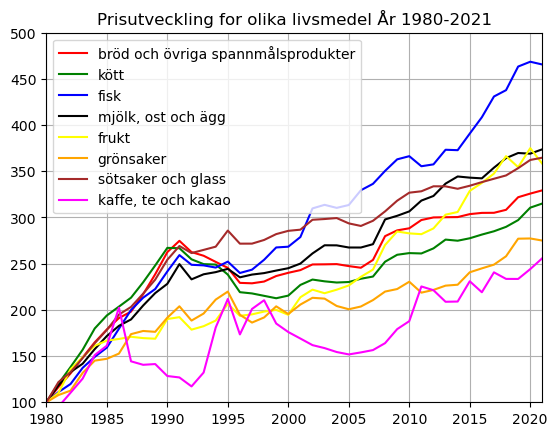

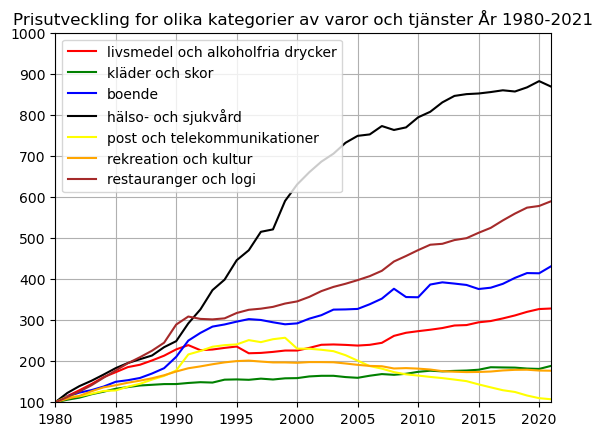

In [14]:
def plot_data(list_of_data):

    # Statisk lista med färger att sätta i grafen
    colors = ["red", "green", "blue", "black", "yellow", "orange", "brown", "magenta"]
    # Skippar första kolumnen som inte innehåller något år
    # Måste göra om strängar till int
    years = [int(year) for year in list_of_data[0][1:]]
    # Om första kolumnen i andra raden innehåller ordet "livsmedel" så är det tjänster
    if "livsmedel" in list_of_data[1][0]:
        plt.ylim([100, 1000])
        plt.title(
            f"Prisutveckling for olika kategorier av varor och tjänster År {years[0]}-{years[len(years)-1]}"
        )
    else:
        plt.ylim([100, 500])
        plt.title(
            f"Prisutveckling for olika livsmedel År {years[0]}-{years[len(years)-1]}"
        )
    i = 0
    for row in list_of_data[1:]:
        # Sätter x-limit till första och sista året i listan
        plt.xlim([years[0], years[len(years) - 1]])
        values = [float(value) for value in row[1:]]
        plt.plot(
            years,
            values,
            # Ett sätt att sätta ny färg dynamiskt
            color=colors[i],
            # Använd radbeskrivningen som label
            label=row[0],
        )
        i += 1
    plt.grid()
    plt.legend()
    plt.show()


plot_data(tjansteData)
plot_data(livsmedelData)


## Deluppgift 4
Ev. kommentar:

## Deluppgift 5
Ev. kommentar:

## Deluppgift 6
Ev. kommentar: